# KNN - K Nearest Neighbors - Classification

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [6]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [7]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<Axes: xlabel='Cancer Present', ylabel='count'>

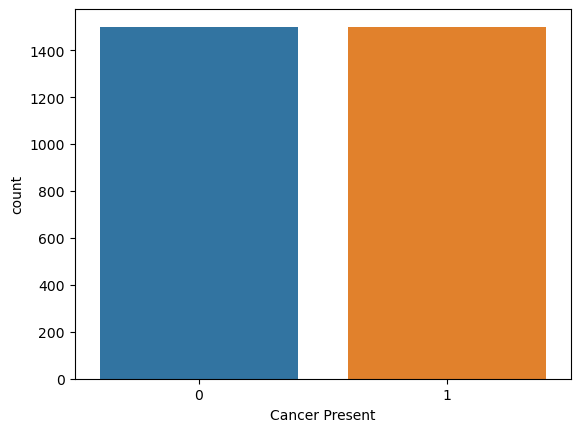

In [8]:
sns.countplot(data=df,x=df['Cancer Present'])

<Axes: xlabel='Cancer Present', ylabel='Gene One'>

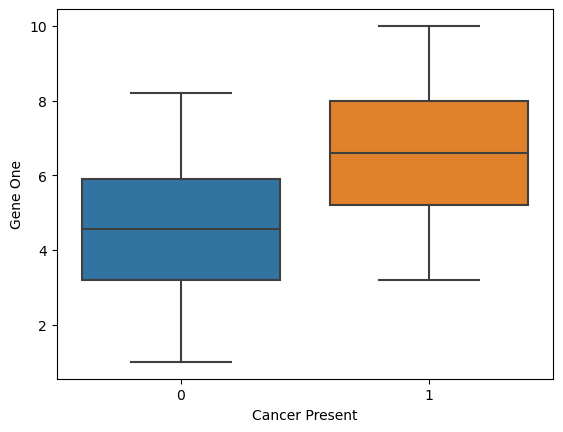

In [9]:
sns.boxplot(data=df,x='Cancer Present', y='Gene One')

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

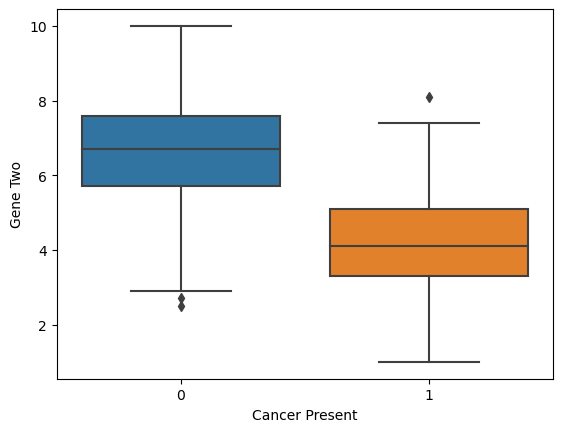

In [10]:
sns.boxplot(data=df,x='Cancer Present', y='Gene Two')

<Axes: xlabel='Gene One', ylabel='Gene Two'>

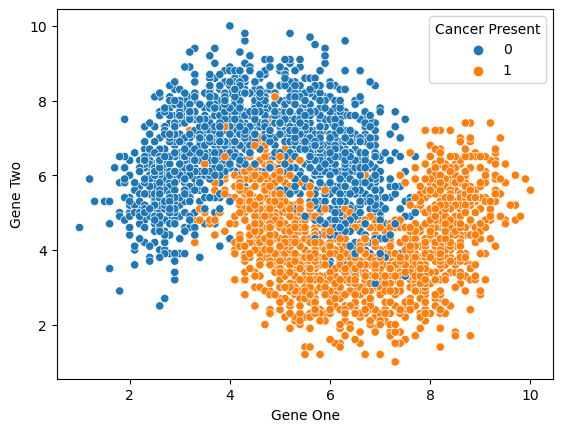

In [11]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present')

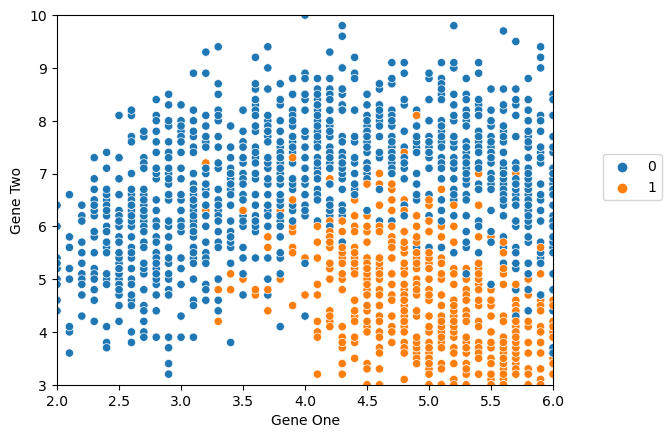

In [12]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

# Train_Test_Split and Scaling Data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('Cancer Present', axis=1)
y=df['Cancer Present']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# KNN Model | Estimater

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
Knn_model=KNeighborsClassifier(n_neighbors=1)

In [19]:
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Model Performance Evaluation

In [20]:
y_pred=Knn_model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [22]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

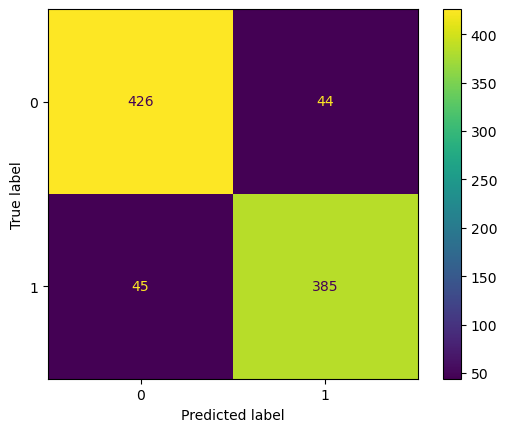

In [23]:
ConfusionMatrixDisplay.from_estimator(Knn_model,X_test,y_test)

In [24]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



# Elbow Method for Choosing Reasonable K Value

In [26]:
test_error_rates=[]

for k in range (1,30):
    Knn_model=KNeighborsClassifier(n_neighbors=k)
    Knn_model.fit(X_train,y_train)
    y_pred=Knn_model.predict(X_test)
    
    test_error=1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

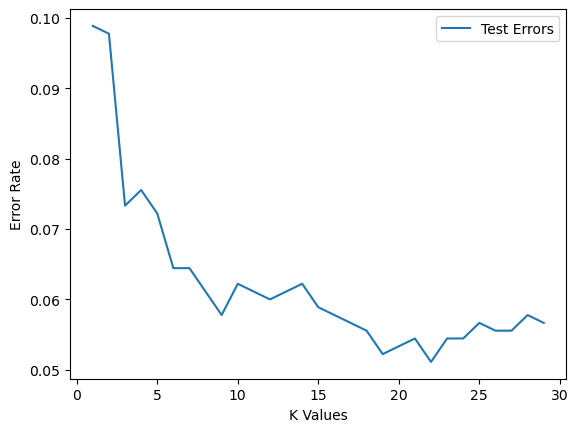

In [27]:
plt.plot(range(1,30), test_error_rates,label='Test Errors')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.legend()

# Full Cross Validation Grid Search for K Value

In [28]:
knn=KNeighborsClassifier()

In [29]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [30]:
operations=[('scaler',scaler),('knn',knn)]

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipe=Pipeline(operations)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
k_values=list(range(1,20))

In [35]:
param_grid={'knn__n_neighbors': k_values}

In [36]:
grid_model=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [37]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [38]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [39]:
y_pred=grid_model.predict(X_test)

In [40]:
confusion_matrix(y_test,y_pred)

array([[449,  21],
       [ 31, 399]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.9422222222222222

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



# The End